In [1]:
"""
Purpose: 
1) Investigate the stitching jobs that errored and see if can fix them so that can do the labeling

"""

'\nPurpose: \n1) Investigate the stitching jobs that errored and see if can fix them so that can do the labeling\n\n'

In [2]:
import datajoint as dj
import numpy as np





In [5]:
pinky = dj.create_virtual_module("pinky","microns_pinky")
schema = dj.schema("microns_pinky")

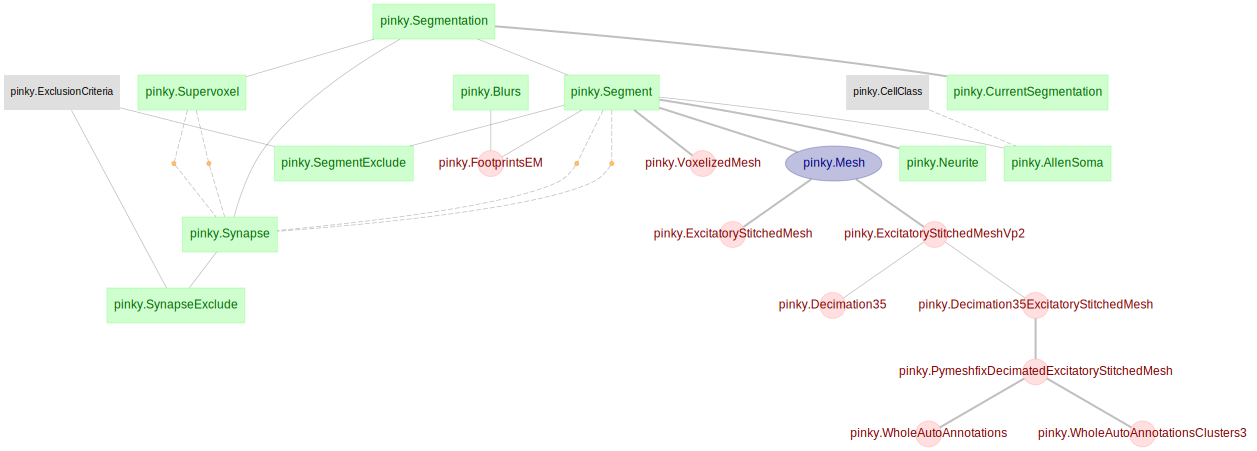

In [6]:
dj.ERD(schema)

In [12]:
#the data source for the stitching:
key_source = pinky.Mesh() & ((pinky.AllenSoma() & "cell_class='excitatory'").proj())
key_source

segmentation segmentation id,segment_id segment id unique within each Segmentation,n_vertices number of vertices in this mesh,n_triangles number of triangles in this mesh,"vertices x,y,z coordinates of vertices",triangles triangles (triplets of vertices)
3,648518346341371119,669574,1316372,=BLOB=,=BLOB=
3,648518346349386137,85806,166966,=BLOB=,=BLOB=
3,648518346349470171,1254494,2496165,=BLOB=,=BLOB=
3,648518346349471156,865120,1721566,=BLOB=,=BLOB=
3,648518346349471500,803277,1599182,=BLOB=,=BLOB=
3,648518346349471562,1343736,2654580,=BLOB=,=BLOB=
3,648518346349471565,2232110,4423873,=BLOB=,=BLOB=


In [7]:
pinky.ExcitatoryStitchedMeshVp2()

segmentation segmentation id,segment_id segment id unique within each Segmentation,n_vertices number of vertices in this mesh,n_triangles number of triangles in this mesh,"vertices x,y,z coordinates of vertices",triangles triangles (triplets of vertices),n_pieces number of unconnected mesh pieces outside the largest mesh piece,largest_piece_perc number of faces percentage of largest mesh piece in respect to total mesh,outside_perc number of faces percentage of mesh outside the biggest mesh piece,n_stitched number of mesh pieces stitched back to main mesh,stitched_addon_perc number of faces percentage of pieces that were stitched back in respect to largest mesh piece,n_unstitched number of mesh pieces remaining unstitched back to main mesh,unstitched_perc number of faces percentage of pieces that were not in respect to largest mesh piece
3,648518346341371119,639722,1274428,=BLOB=,=BLOB=,0,0.96814,0.96814,0,0.00000,0,0.00000
3,648518346349386137,81151,161100,=BLOB=,=BLOB=,0,0.96487,0.96487,0,0.00000,0,0.00000
3,648518346349470171,1102842,2198222,=BLOB=,=BLOB=,43,0.73927,0.88110,42,0.19123,1,0.00002
3,648518346349471156,783999,1565239,=BLOB=,=BLOB=,16,0.90102,0.90916,16,0.00908,0,0.00000
3,648518346349471500,743900,1489208,=BLOB=,=BLOB=,2,0.93106,0.93124,2,0.00019,0,0.00000
3,648518346349471562,1294767,2579165,=BLOB=,=BLOB=,18,0.96604,0.97157,18,0.00574,0,0.00000
3,648518346349471565,2183207,4352068,=BLOB=,=BLOB=,16,0.92285,0.98378,14,0.06602,2,0.00002


In [24]:
schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__component_auto_segment_whole_stitch,4c6e641417ba4cd09f01189b30e169a6,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.81,20812b49dcd8,25316,67852,2019-06-09 15:29:54
__excitatory_stitched_mesh,60ab82cf1f443b9cc1c3743ce9e59bf4,error,=BLOB=,RuntimeError: File size unexpectedly exceeded ZIP64 limit,=BLOB=,celiib@10.28.0.81,20812b49dcd8,20195,32600,2019-06-09 04:34:38
__excitatory_stitched_mesh,a53dd4ad1911ef0b6e264ef97aff9b2e,error,=BLOB=,Exception: Too many edges for 1st facet start point,=BLOB=,celiib@10.28.0.81,20812b49dcd8,19507,28210,2019-06-07 07:50:26
__excitatory_stitched_mesh_vp2,60ab82cf1f443b9cc1c3743ce9e59bf4,error,=BLOB=,KeyboardInterrupt,=BLOB=,celiib@10.28.0.81,20812b49dcd8,38865,111742,2019-06-11 15:16:44


In [22]:
(schema.jobs & "table_name='__decimation35_excitatory_stitched_mesh'").delete()

In [10]:
data= (schema.jobs & 'table_name = "__excitatory_stitched_mesh_vp2"').fetch("key","error_message")

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__excitatory_stitched_mesh_vp2,60ab82cf1f443b9cc1c3743ce9e59bf4,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.81,20812b49dcd8,22752,58563,2019-06-08 20:40:35
__excitatory_stitched_mesh_vp2,926bac1d8b335ce4f075fd3af654f596,error,=BLOB=,Exception: Too many edges for 1st facet start point,=BLOB=,celiib@10.28.0.81,20812b49dcd8,22480,58560,2019-06-08 20:11:19
__excitatory_stitched_mesh_vp2,eed2a37cb373503b0d6c8883f1ba985a,error,=BLOB=,Exception: Too many edges for 1st facet start point,=BLOB=,celiib@10.28.0.81,20812b49dcd8,23846,58594,2019-06-08 20:32:37


In [18]:
data= (schema.jobs & 'table_name = "__excitatory_stitched_mesh_vp2"').fetch("key","error_message")
for key,error in zip(data[0],data[1]):
    print(f" {key} with error {error}" )

 [(3, 648518346349506596)] with error 
 [(3, 648518346349498116)] with error Exception: Too many edges for 1st facet start point
 [(3, 648518346349503473)] with error Exception: Too many edges for 1st facet start point


In [13]:
key_source.proj("segment_id") - pinky.ExcitatoryStitchedMeshVp2.proj("segment_id")

segmentation segmentation id,segment_id segment id unique within each Segmentation
3,648518346349498116
3,648518346349503473
3,648518346349506596


In [ ]:
"""
Conclusion: 
3 ones were errored:
648518346349498116, 648518346349503473 had the exception of too many edges for 1st facet starting point
648518346349506596 did not have an error --> the reason it didn't run was that it had 

"""

In [23]:
pinky.Decimation35ExcitatoryStitchedMesh()

segmentation segmentation id,segment_id segment id unique within each Segmentation,decimation_ratio,n_vertices,n_triangles,vertices,triangles
3,648518346341371119,0.35,223704,446048,=BLOB=,=BLOB=
3,648518346349386137,0.35,28326,56385,=BLOB=,=BLOB=
3,648518346349470171,0.35,385617,769377,=BLOB=,=BLOB=
3,648518346349471156,0.35,272711,547833,=BLOB=,=BLOB=
3,648518346349471500,0.35,257282,521221,=BLOB=,=BLOB=
3,648518346349471562,0.35,452678,902707,=BLOB=,=BLOB=
3,648518346349471565,0.35,763508,1523223,=BLOB=,=BLOB=


In [ ]:
}